# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities[0])

Number of cities in the list: 612
rikitea


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
#test
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&q={cities[0]}&units=metric"
#city_url = f"{url}appid={weather_api_key}&q=faanui&units=metric"
print(city_url)

city_weather = requests.get(city_url)
weather_json = city_weather.json()
print(weather_json)

city_lat = weather_json["coord"]["lat"]
city_lng = weather_json["coord"]["lon"]
city_max_temp = weather_json["main"]["temp_max"]
city_humidity = weather_json["main"]["humidity"]
city_clouds = weather_json["clouds"]["all"]
city_wind = weather_json["wind"]["speed"]
city_country = weather_json["sys"]["country"]
city_date = weather_json["dt"]

city_lat

http://api.openweathermap.org/data/2.5/weather?appid=9db0d6142b15e01938ab124eba6ca688&q=rikitea&units=metric
{'coord': {'lon': -134.9692, 'lat': -23.1203}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 25.84, 'feels_like': 26.41, 'temp_min': 25.84, 'temp_max': 25.84, 'pressure': 1018, 'humidity': 74, 'sea_level': 1018, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 4.91, 'deg': 59, 'gust': 5.14}, 'rain': {'1h': 0.25}, 'clouds': {'all': 80}, 'dt': 1675015362, 'sys': {'country': 'PF', 'sunrise': 1675003040, 'sunset': 1675050508}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}


-23.1203

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    

    # Create endpoint URL with each city
    city_index = cities[i]
    city_url = f"{url}appid={weather_api_key}&q={city_index}&units=metric"
    
    # Log the url, record, and set numbers
    #print(city_url)
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | meulaboh
Processing Record 5 of Set 1 | ritchie
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | mnogovershinnyy
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | pangody
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | aksay
Processing Record 18 of Set 1 | berlevag
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 

Processing Record 37 of Set 4 | te anau
Processing Record 38 of Set 4 | ry
City not found. Skipping...
Processing Record 39 of Set 4 | bargal
City not found. Skipping...
Processing Record 40 of Set 4 | formosa
Processing Record 41 of Set 4 | san cristobal
Processing Record 42 of Set 4 | kargasok
Processing Record 43 of Set 4 | komsomolskiy
Processing Record 44 of Set 4 | nazilli
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | badhni kalan
Processing Record 47 of Set 4 | washougal
Processing Record 48 of Set 4 | bondo
Processing Record 49 of Set 4 | umm lajj
Processing Record 0 of Set 5 | mabaruma
Processing Record 1 of Set 5 | tokur
Processing Record 2 of Set 5 | mecca
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | kyren
Processing Record 5 of Set 5 | sheltozero
Processing Record 6 of Set 5 | kibala
Processing Record 7 of Set 5 | ikalamavony
Processing Record 8 of Set 5 | puerto carreno
Processing Record 9 of Set 5 | shirokiy
Processi

Processing Record 27 of Set 8 | kytlym
City not found. Skipping...
Processing Record 28 of Set 8 | bonao
Processing Record 29 of Set 8 | la palma
Processing Record 30 of Set 8 | aswan
Processing Record 31 of Set 8 | yerbogachen
Processing Record 32 of Set 8 | parys
Processing Record 33 of Set 8 | guerrero negro
Processing Record 34 of Set 8 | hambantota
Processing Record 35 of Set 8 | karachi
Processing Record 36 of Set 8 | butembo
Processing Record 37 of Set 8 | borisovka
Processing Record 38 of Set 8 | zhezkazgan
Processing Record 39 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 8 | tahta
Processing Record 41 of Set 8 | dandong
Processing Record 42 of Set 8 | pierrelatte
Processing Record 43 of Set 8 | marsa matruh
Processing Record 44 of Set 8 | kasama
Processing Record 45 of Set 8 | kenai
Processing Record 46 of Set 8 | tezu
Processing Record 47 of Set 8 | matadi
Processing Record 48 of Set 8 | thaton
Processing Record 49 of Set 8 | souillac
Proces

Processing Record 16 of Set 12 | chhagalnaiya
Processing Record 17 of Set 12 | farmington
Processing Record 18 of Set 12 | okha
Processing Record 19 of Set 12 | birao
Processing Record 20 of Set 12 | mataram
Processing Record 21 of Set 12 | tromso
Processing Record 22 of Set 12 | palmer
Processing Record 23 of Set 12 | mampong
Processing Record 24 of Set 12 | sistranda
Processing Record 25 of Set 12 | taloqan
Processing Record 26 of Set 12 | chippewa falls
Processing Record 27 of Set 12 | vanavara
Processing Record 28 of Set 12 | zaraza
Processing Record 29 of Set 12 | wanaka
Processing Record 30 of Set 12 | port hawkesbury
Processing Record 31 of Set 12 | doha
Processing Record 32 of Set 12 | olavarria
Processing Record 33 of Set 12 | yangjiang
Processing Record 34 of Set 12 | thinadhoo
Processing Record 35 of Set 12 | stornoway
Processing Record 36 of Set 12 | uusikaupunki
Processing Record 37 of Set 12 | micheweni
Processing Record 38 of Set 12 | pangnirtung
Processing Record 39 of 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,25.84,74,80,4.91,PF,1675015362
1,severo-kurilsk,50.6789,156.1250,-2.84,91,100,13.79,RU,1675015393
2,meulaboh,4.1363,96.1285,25.04,90,98,1.72,ID,1675015393
3,ritchie,-29.0380,24.6028,28.83,19,14,5.22,ZA,1675015394
4,carnarvon,-24.8667,113.6333,22.71,83,0,3.75,AU,1675015397


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID", encoding = "utf-8")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.84,74,80,4.91,PF,1675015362
1,severo-kurilsk,50.6789,156.1250,-2.84,91,100,13.79,RU,1675015393
2,meulaboh,4.1363,96.1285,25.04,90,98,1.72,ID,1675015393
3,ritchie,-29.0380,24.6028,28.83,19,14,5.22,ZA,1675015394
4,carnarvon,-24.8667,113.6333,22.71,83,0,3.75,AU,1675015397


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

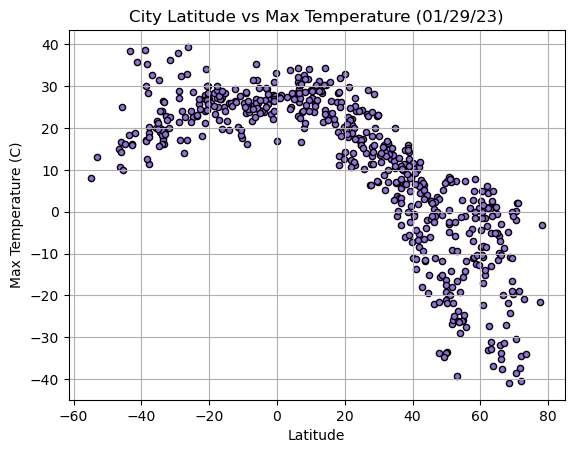

In [28]:
# Build scatter plot for latitude vs. temperature

Temperature_plot = city_data_df.plot.scatter(x = "Lat", y = "Max Temp", c = "mediumpurple", 
                                             edgecolors = "black", grid = True)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (01/29/23)")
Temperature_plot.set_xlabel("Latitude")
Temperature_plot.set_ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

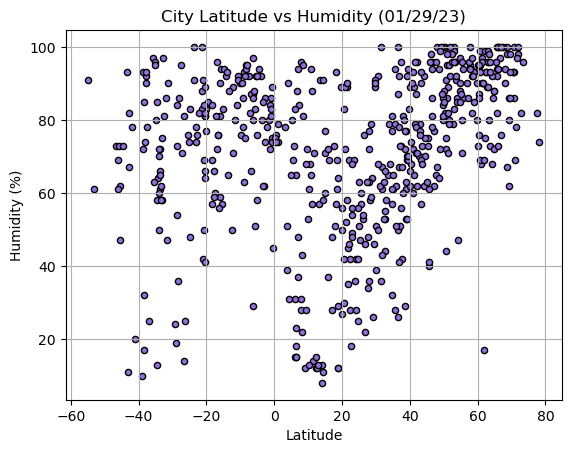

In [29]:
# Build the scatter plots for latitude vs. humidity
Humidity_plot = city_data_df.plot.scatter(x = "Lat", y = "Humidity", c = "mediumpurple", 
                                          edgecolors = "black", grid = True)
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (01/29/23)")
Humidity_plot.set_xlabel("Latitude")
Humidity_plot.set_ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

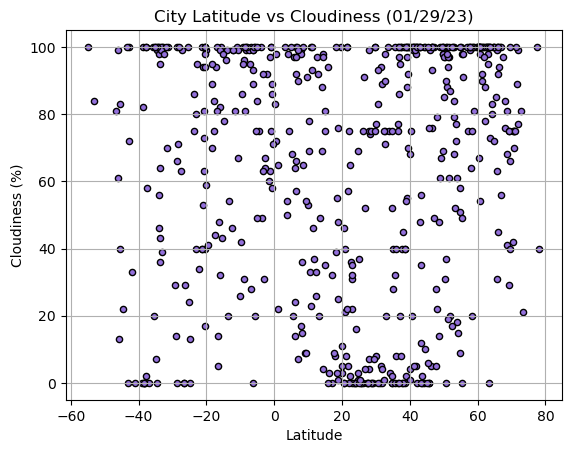

In [32]:
# Build the scatter plots for latitude vs. cloudiness
Cloud_plot = city_data_df.plot.scatter(x = "Lat", y = "Cloudiness", c = "mediumpurple", 
                                          edgecolors = "black", grid = True)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (01/29/23)")
Cloud_plot.set_xlabel("Latitude")
Cloud_plot.set_ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

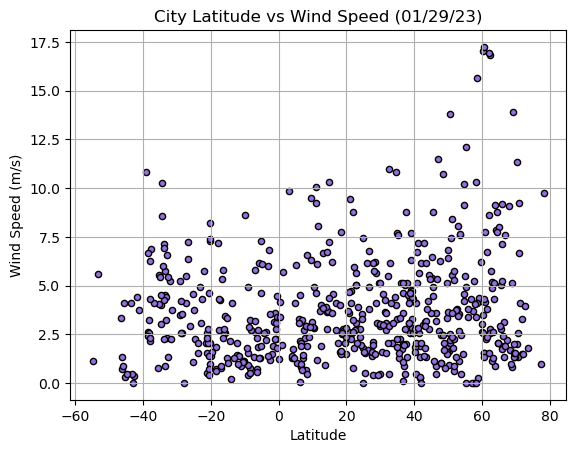

In [34]:
# Build the scatter plots for latitude vs. wind speed
Wind_plot = city_data_df.plot.scatter(x = "Lat", y = "Wind Speed", c = "mediumpurple", 
                                          edgecolors = "black", grid = True)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (01/29/23)")
Wind_plot.set_xlabel("Latitude")
Wind_plot.set_ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots

def calc_regression (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    return line_eq, regress_values, rvalue

#testing - can delete when done
#x_values = city_data_df["Lat"]
#y_values = city_data_df["Max Temp"]

#line_eq = calc_regression(x_values, y_values)[0]
#regress_values = calc_regression(x_values, y_values)[1]
#r_squared = calc_regression(x_values, y_values)[2]**2

#print(line_eq)
#print(regress_values)
#print(r_squared)

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()
print(len(northern_hemi_df))

398


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()
print(len(southern_hemi_df))

170


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.69


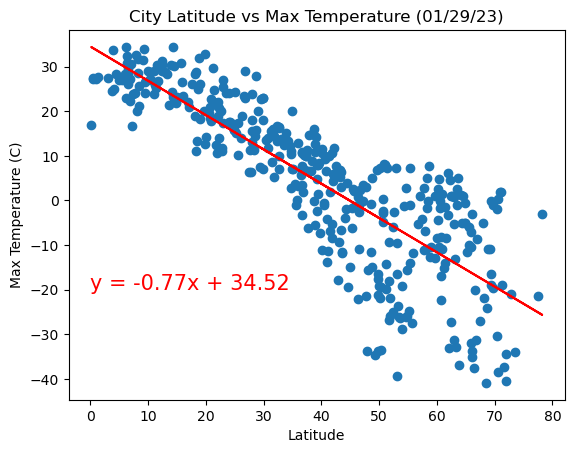

In [80]:
# Linear regression on Northern Hemisphere

#set up variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#regression data using function
line_eq = calc_regression(x_values, y_values)[0]
regress_values = calc_regression(x_values, y_values)[1]
r_squared = calc_regression(x_values, y_values)[2]**2

#plot data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

plt.title("City Latitude vs Max Temperature (01/29/23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

print(f"The r-squared value is: {round(r_squared,2)}")
plt.show()

The r-squared value is: 0.15


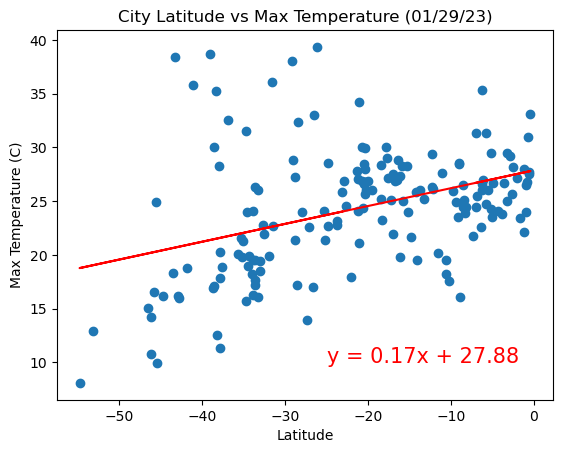

In [83]:
# Linear regression on Southern Hemisphere

#set up variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#regression data using function
line_eq = calc_regression(x_values, y_values)[0]
regress_values = calc_regression(x_values, y_values)[1]
r_squared = calc_regression(x_values, y_values)[2]**2

#plot data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.title("City Latitude vs Max Temperature (01/29/23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

print(f"The r-squared value is: {round(r_squared,2)}")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there is a negative correlation between latitude and temperature (as latitude increases, the temperature decreases).  The opposite is true for the southern hemisphere as it has a postive correlation.  Based on the data in this dataset, the relationship between latitude and temperature is significantly stronger in the northern hemisphere.  This finding could potentially be affected by the dataset for the northern hemisphere having slightly more than twice the number of data points in the dataset.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.34


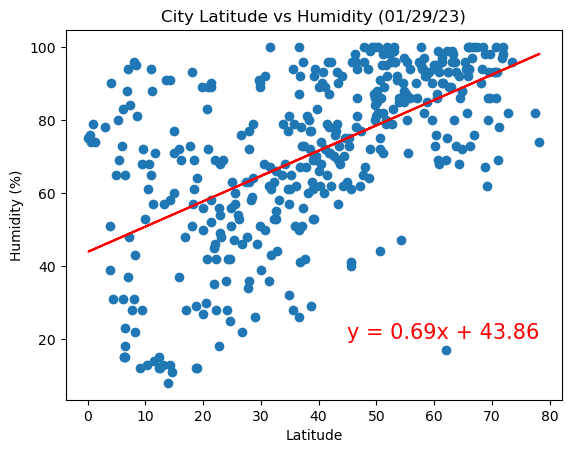

In [88]:
# Northern Hemisphere

#set up variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#regression data using function
line_eq = calc_regression(x_values, y_values)[0]
regress_values = calc_regression(x_values, y_values)[1]
r_squared = calc_regression(x_values, y_values)[2]**2

#plot data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

plt.title("City Latitude vs Humidity (01/29/23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared value is: {round(r_squared,2)}")
plt.show()

The r-squared value is: 0.08


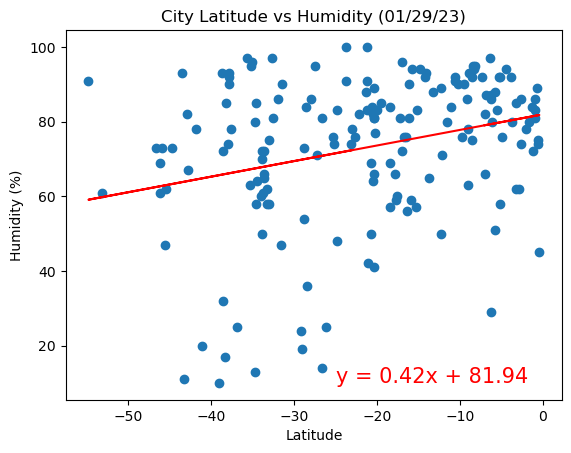

In [89]:
# Southern Hemisphere

#set up variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#regression data using function
line_eq = calc_regression(x_values, y_values)[0]
regress_values = calc_regression(x_values, y_values)[1]
r_squared = calc_regression(x_values, y_values)[2]**2

#plot data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.title("City Latitude vs Humidity (01/29/23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared value is: {round(r_squared,2)}")
plt.show()

**Discussion about the linear relationship:**  In both hemispheres, there is a weak positive correlation between latitude and % Humidity.  The correleation is so weak in the southern hemisphere that there is likely no correlation at all.  Again, the imbalance in the data between the 2 hemispheres could contribute to the weaker correlation in the southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.08


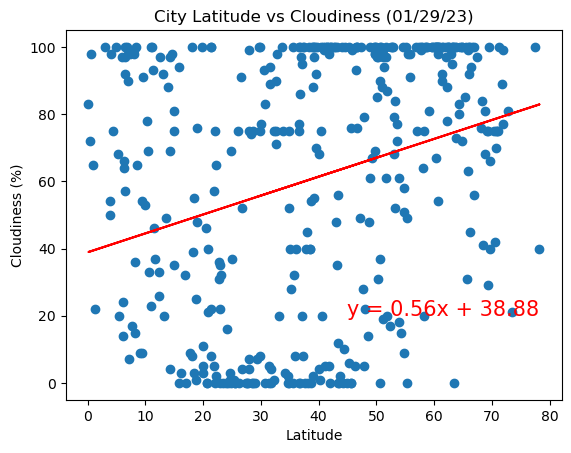

In [90]:
# Northern Hemisphere

#set up variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#regression data using function
line_eq = calc_regression(x_values, y_values)[0]
regress_values = calc_regression(x_values, y_values)[1]
r_squared = calc_regression(x_values, y_values)[2]**2

#plot data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

plt.title("City Latitude vs Cloudiness (01/29/23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared value is: {round(r_squared,2)}")
plt.show()

The r-squared value is: 0.04


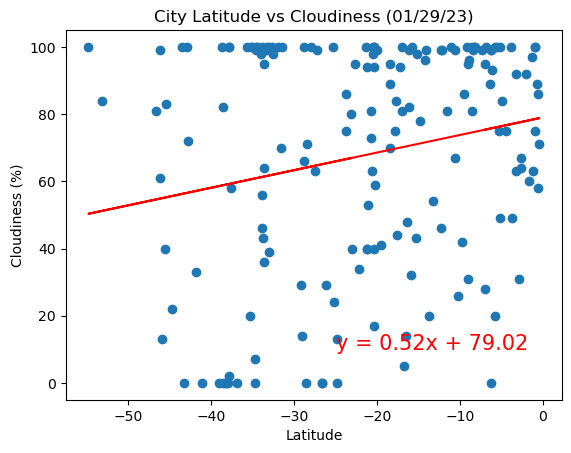

In [91]:
# Southern Hemisphere

#set up variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#regression data using function
line_eq = calc_regression(x_values, y_values)[0]
regress_values = calc_regression(x_values, y_values)[1]
r_squared = calc_regression(x_values, y_values)[2]**2

#plot data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.title("City Latitude vs Cloudiness (01/29/23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared value is: {round(r_squared,2)}")
plt.show()

**Discussion about the linear relationship:** The R-squared values of both hemispheres are very low indicating no real correlation between latitude and the level of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.02


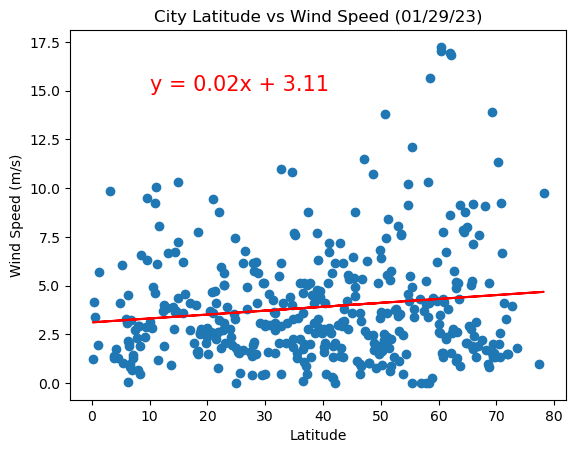

In [93]:
# Northern Hemisphere

#set up variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#regression data using function
line_eq = calc_regression(x_values, y_values)[0]
regress_values = calc_regression(x_values, y_values)[1]
r_squared = calc_regression(x_values, y_values)[2]**2

#plot data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

plt.title("City Latitude vs Wind Speed (01/29/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r-squared value is: {round(r_squared,2)}")
plt.show()

The r-squared value is: 0.02


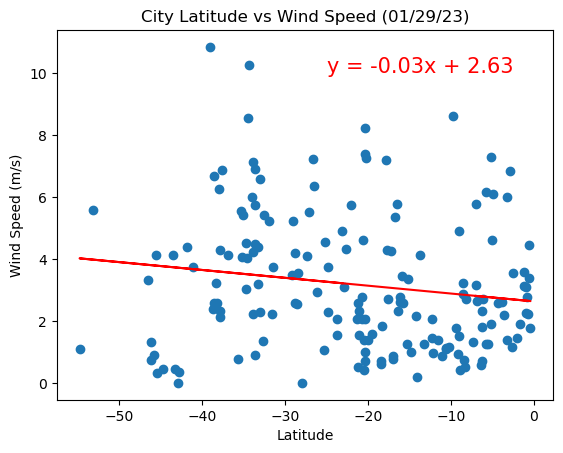

In [94]:
# Southern Hemisphere

#set up variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#regression data using function
line_eq = calc_regression(x_values, y_values)[0]
regress_values = calc_regression(x_values, y_values)[1]
r_squared = calc_regression(x_values, y_values)[2]**2

#plot data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.title("City Latitude vs Wind Speed (01/29/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r-squared value is: {round(r_squared,2)}")
plt.show()

**Discussion about the linear relationship:** The R-squared values of both hemispheres are very low indicating no real correlation between latitude and the wind speed.